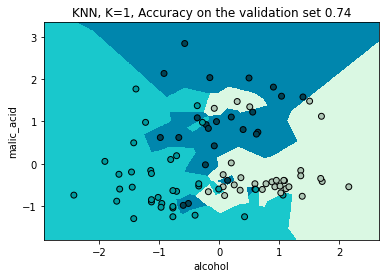

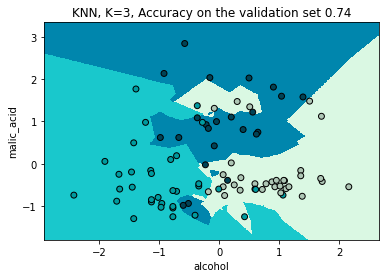

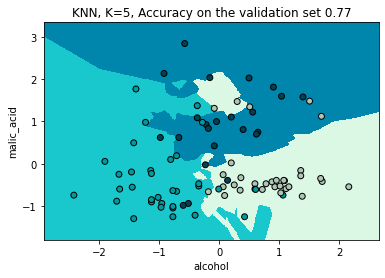

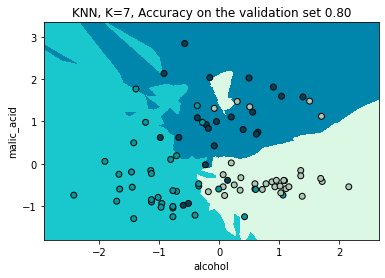

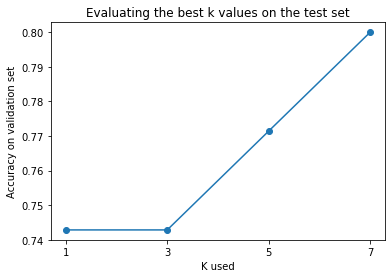

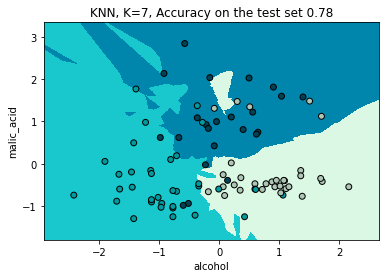

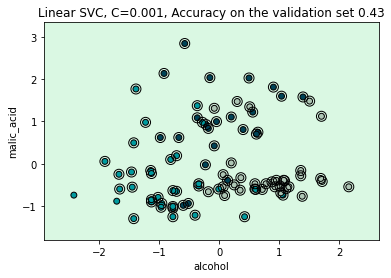

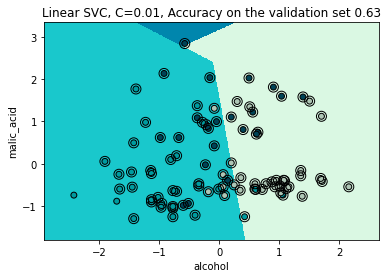

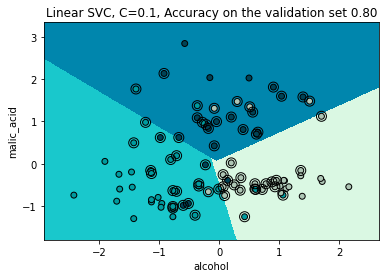

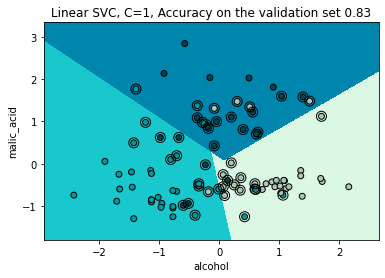

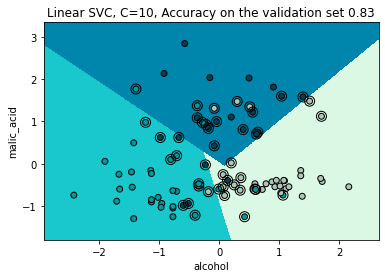

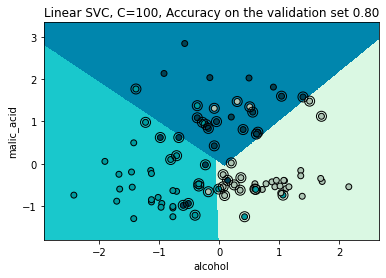

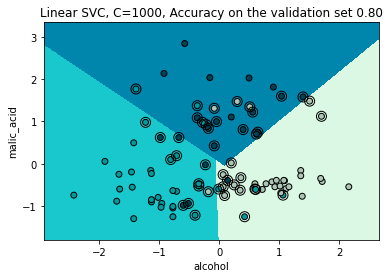

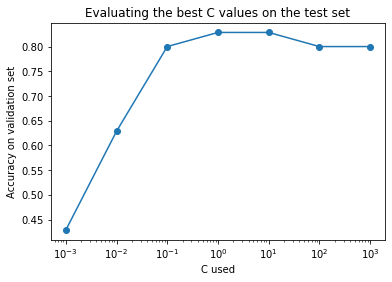

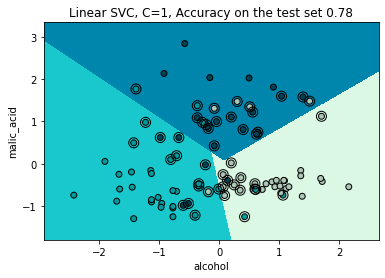

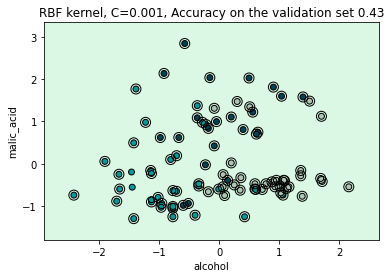

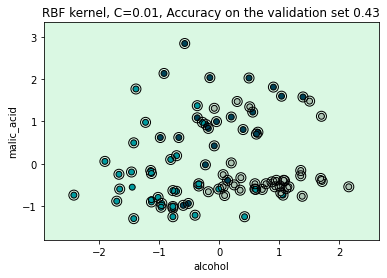

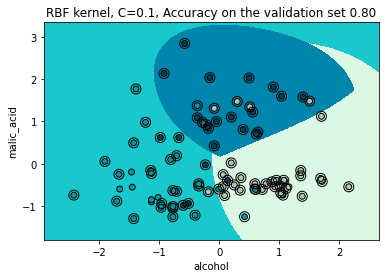

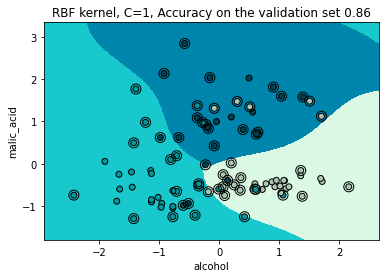

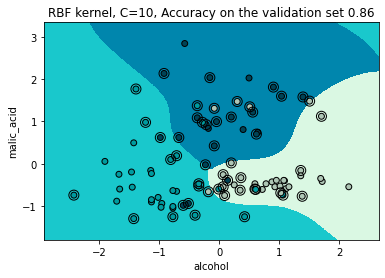

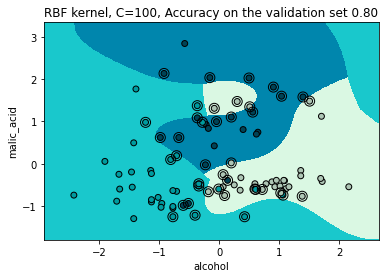

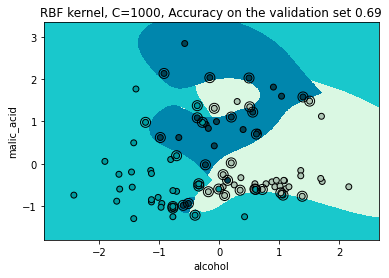

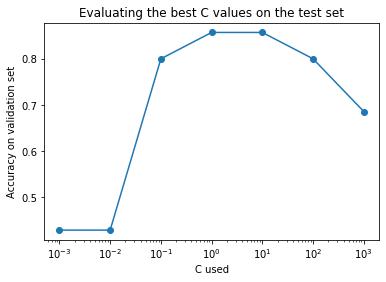

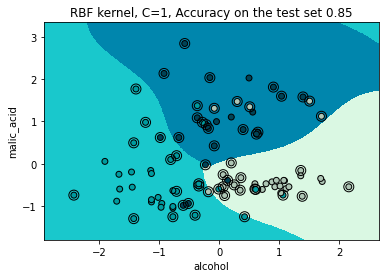

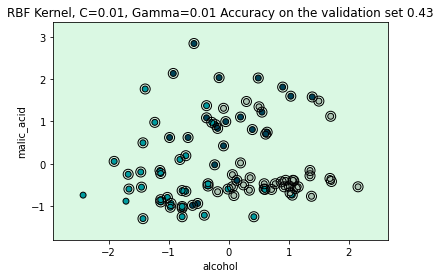

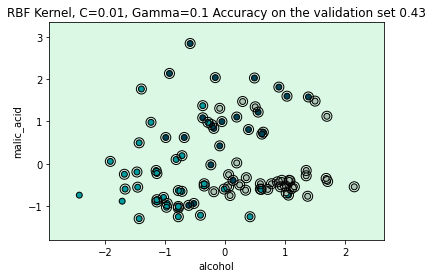

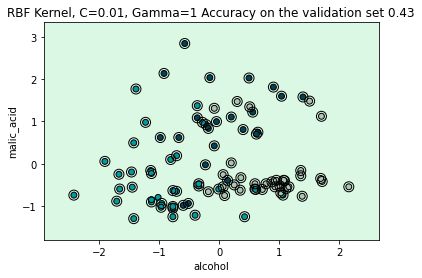

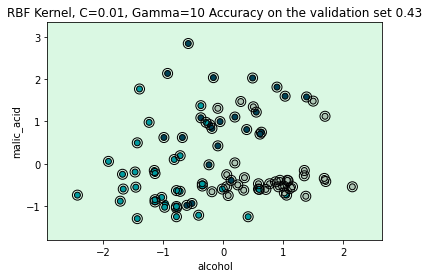

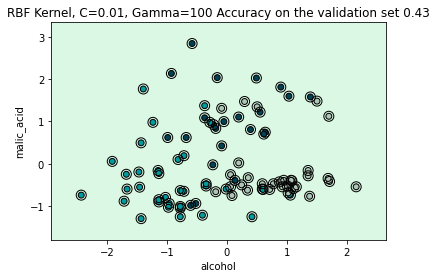

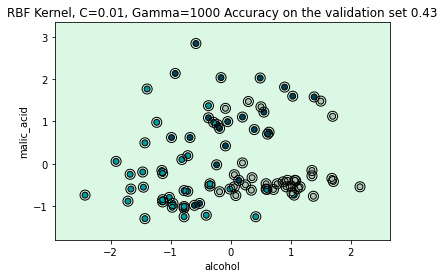

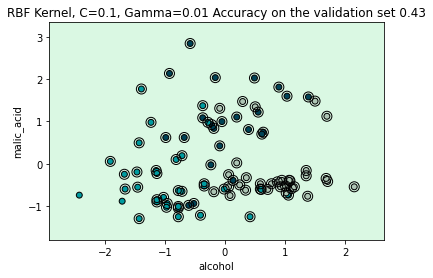

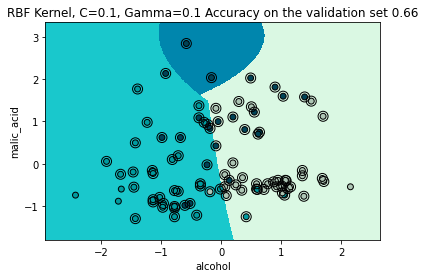

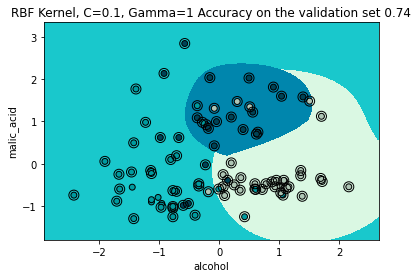

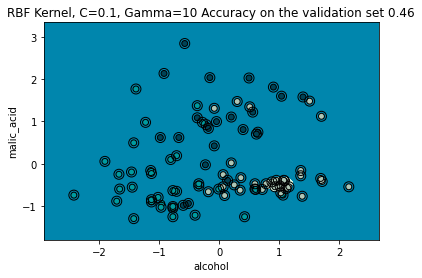

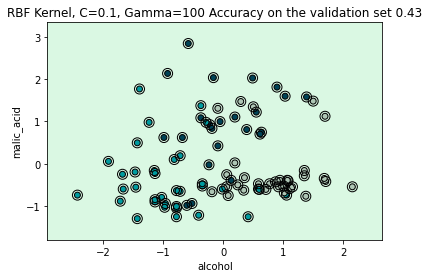

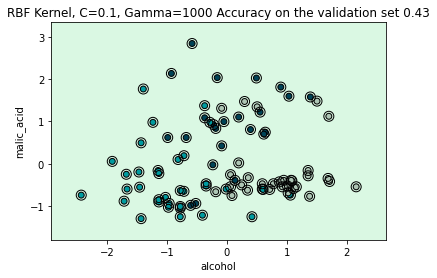

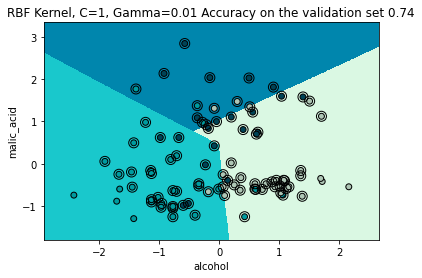

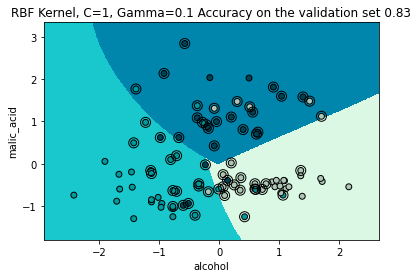

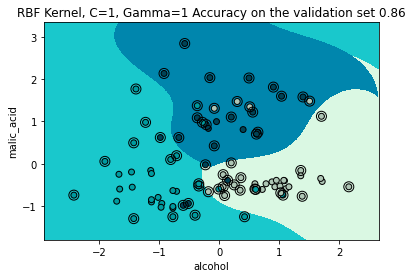

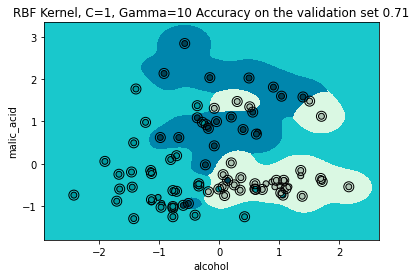

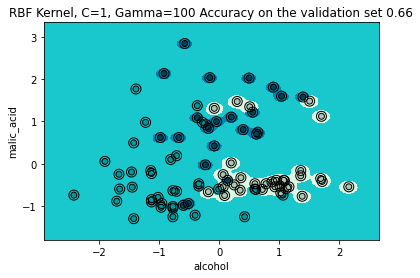

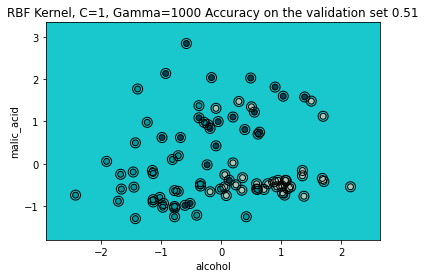

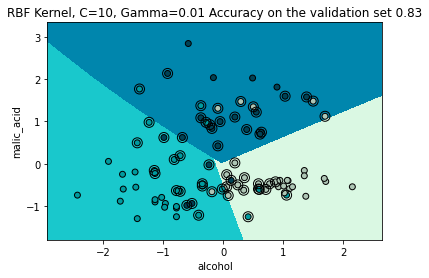

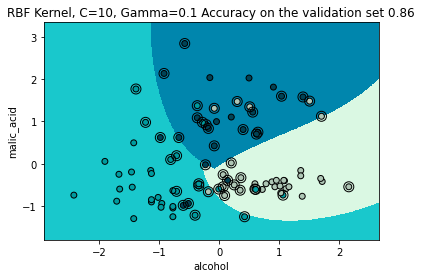

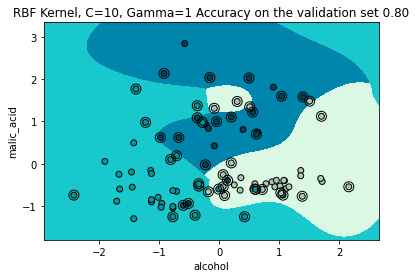

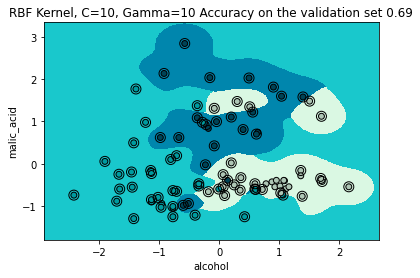

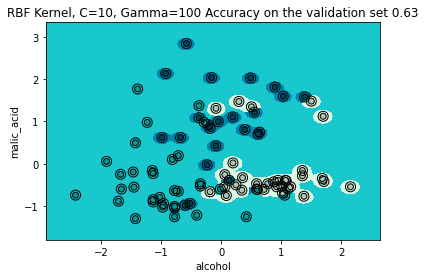

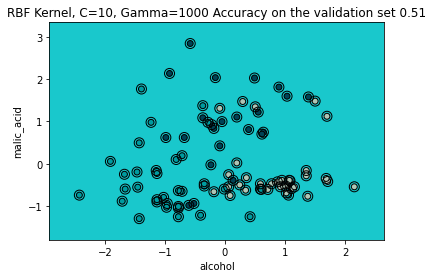

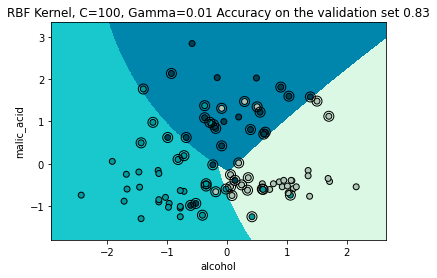

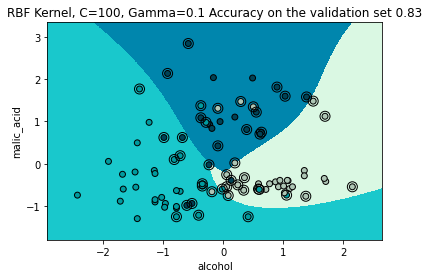

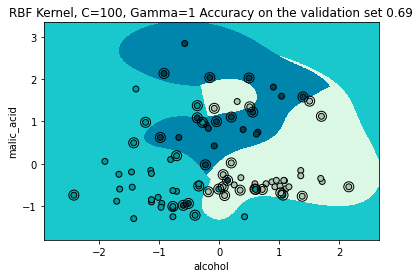

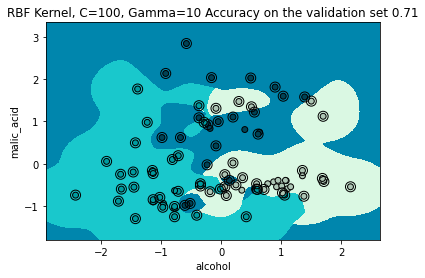

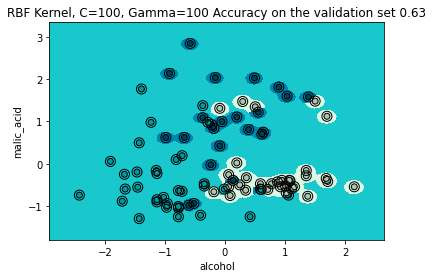

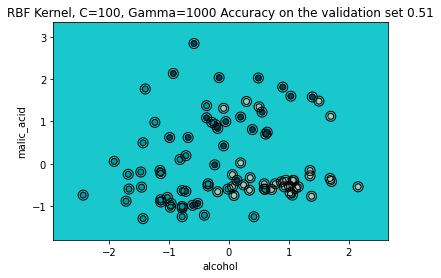

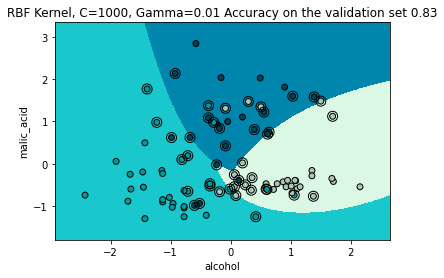

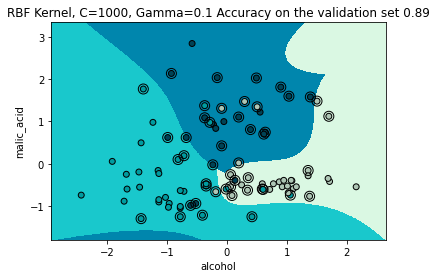

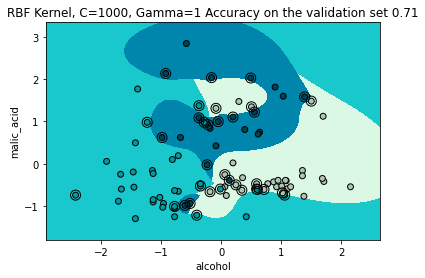

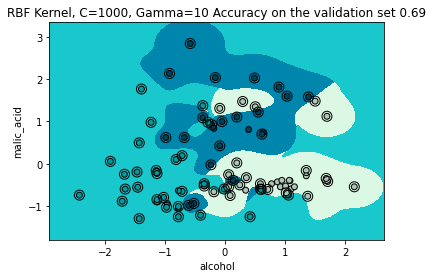

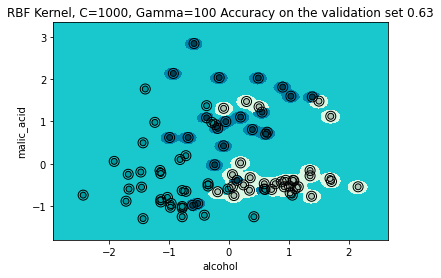

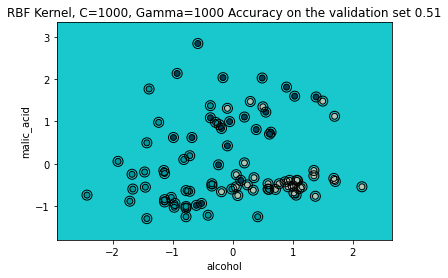

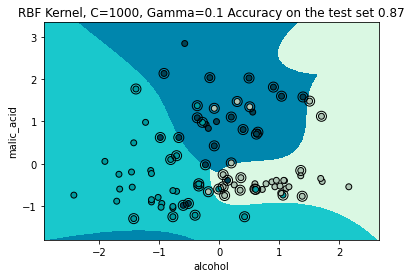

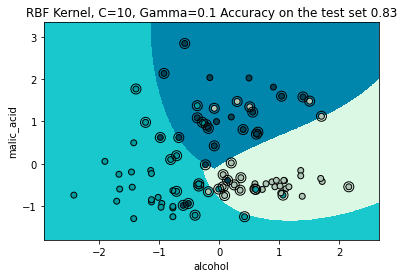

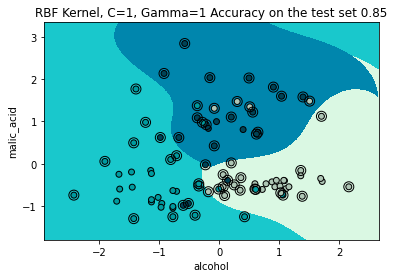

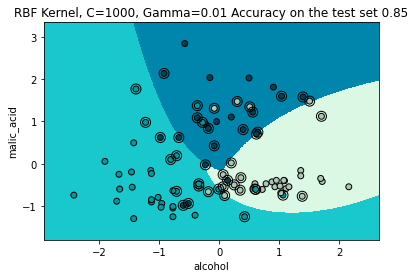

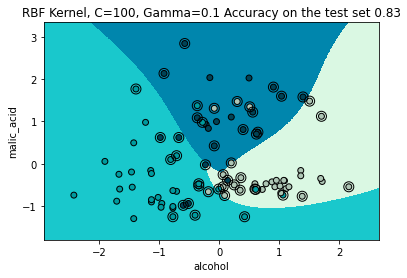

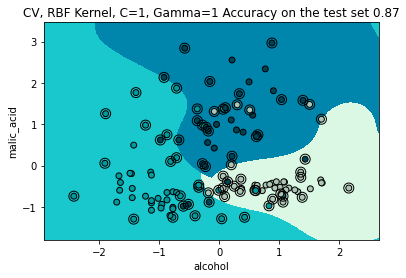

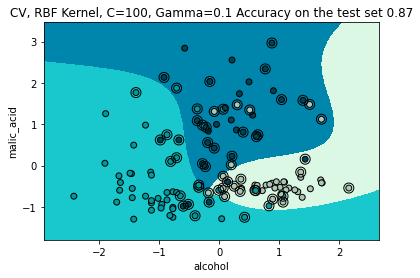

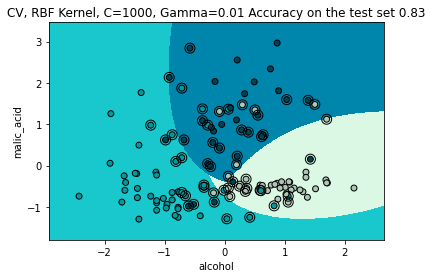

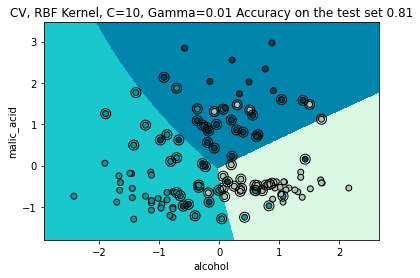

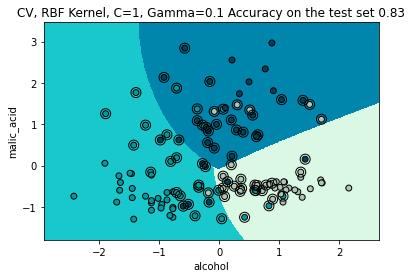

In [17]:
from sklearn.decomposition import PCA
import sklearn
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors as KNN
from sklearn.neighbors import KNeighborsClassifier as knc
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import os
import shutil
import matplotlib.ticker as mticker
from sklearn.svm import SVC as svc
from sklearn.model_selection import KFold

%matplotlib inline

# loading data and normalizing

data=load_wine()
data = pd.DataFrame(data= np.c_[data['data'], data['target']],columns= data['feature_names'] + ['target'])
classes=data["target"]
dataset=data[['alcohol','malic_acid','ash','alcalinity_of_ash','magnesium','total_phenols','flavanoids',
             'nonflavanoid_phenols','proanthocyanins','color_intensity','hue','od280/od315_of_diluted_wines','proline']]
pca=PCA(n_components=2)
X_pca=pca.fit_transform(data)
data['pca0']=X_pca[:,0]
data['pca1']=X_pca[:,1]

data=(data-data.mean())/data.std()

attr1="alcohol"
attr2="malic_acid"
two=data[[attr1,attr2]]

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cmap_light = ListedColormap(['#DAF8E3', '#19c8cc', '#0086AD'])
cmap_bold= ListedColormap(['#aec6b5', '#009b9f', '#004356'])

# Splitting dataset

X_training,X_test,y_training,y_test= train_test_split(two, classes, test_size=0.3, random_state=0)
X_train,X_val,y_train,y_val= train_test_split(X_training, y_training, test_size=0.28, random_state=0)

# Function used to plot decision boundaries

def plottingboundaries(model, attr1, attr2, X_train, y_train_f, X_val, y_val, X_test, y_test, pred, plot_tytle, path, svm, test):  
    plt.figure()
    X=X_train.to_numpy()
    h=0.005
    x_min, x_max = X[:,0].min() - .5, X[:,0].max() + .5
    y_min, y_max = X[:,1].min() - .5, X[:,1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    modelplot=plt.scatter(x=X_train[attr1], y=X_train[attr2], c=y_train_f,edgecolors='#000000', s=35, cmap=cmap_bold)
    plt.xlabel(attr1)
    plt.ylabel(attr2)
    if test==True:
        acc=accuracy_score(y_test,pred)
    else:
        acc=accuracy_score(y_val,pred)
    plot_tytle+=(f" {acc:.2f}")
    plt.title(plot_tytle)
    if svm==True:
        plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
    #plot_tytle+='.png'
    if test==True:
        file=path+'Test, '+plot_tytle+'.jpg'
    if test==False:
        file=path+plot_tytle+'.jpg'
    plt.savefig(file, format='jpg')
    plt.show()
    plt.close()
    return acc

# Using KNN, evaluating results and saving them into folders

ks=[1,3,5,7]
knn_acc=[]
path = r'C:\Users\emanu\Documents\Polito\Machine Deep Learning\Homework1\KNN1'

if os.path.exists(path):
    shutil.rmtree(path)
os.makedirs(path)
path=path+'\\'
knn_acc=[]
for k in ks:
    y_train_f=np.ravel(y_train)
    myknc=knc(n_neighbors=k).fit(X_train, y_train_f)
    pred=myknc.predict(X_val)
    tytle=(f"KNN, K={k}, Accuracy on the validation set")
    acc=plottingboundaries(myknc, attr1, attr2, X_train, y_train_f, X_val, y_val, X_test, y_test, pred, tytle, path, False, False)
    knn_acc.append(acc)

kwinner=ks[np.argmax(knn_acc)]
plt.figure()
plt.xlabel("K used")
plt.ylabel("Accuracy on validation set")
plt.xticks(ks)
plt.title("Evaluating the best k values on the test set")
plt.plot(ks,knn_acc, '-o')
f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.savefig(path+"evaluation", format='png')
myknc=knc(n_neighbors=kwinner).fit(X_train, y_train_f)
pred=myknc.predict(X_test)
accwinner=accuracy_score(y_test,pred)
tytle=(f"KNN, K={kwinner}, Accuracy on the test set")
acc=plottingboundaries(myknc, attr1, attr2, X_train, y_train_f, X_val, y_val, X_test, y_test, pred, tytle, path, False, True)

# Using SVC linear, evaluating results and saving them into folders

linear_svc_acc=[]
cs=[0.001,0.01,0.1,1,10,100,1000]
path = r'C:\Users\emanu\Documents\Polito\Machine Deep Learning\Homework1\SVCLinear1'
if os.path.exists(path):
    shutil.rmtree(path)
os.makedirs(path)
path=path+'\\'

for c in cs:
    y_train_f=np.ravel(y_train)
    mysvclinear=svc(C=c, kernel='linear').fit(X_train, y_train_f)
    pred=mysvclinear.predict(X_val)
    tytle=(f"Linear SVC, C={c}, Accuracy on the validation set")
    acc=plottingboundaries(mysvclinear, attr1, attr2, X_train, y_train_f, X_val, y_val, X_test, y_test, pred, tytle, path, True, False)
    linear_svc_acc.append(acc)
    
cwinner=cs[np.argmax(linear_svc_acc)]
plt.figure()
plt.xlabel("C used")
plt.ylabel("Accuracy on validation set")
plt.xscale('log')
plt.xticks(cs)
plt.title("Evaluating the best C values on the test set")
plt.plot(cs, linear_svc_acc, '-o')
plt.savefig(path+"evaluation", format='png')
mysvclinear=svc(C=cwinner, kernel='linear').fit(X_train, y_train_f)
pred=myknc.predict(X_test)
accwinner=accuracy_score(y_test,pred)
tytle=(f"Linear SVC, C={cwinner}, Accuracy on the test set")

acc=plottingboundaries(mysvclinear, attr1, attr2, X_train, y_train_f, X_val, y_val, X_test, y_test, pred, tytle, path, True, True)


# Using SVM with RBF kernel, evaluating results and saving them into folders

path = r'C:\Users\emanu\Documents\Polito\Machine Deep Learning\Homework1\RBF1'
if os.path.exists(path):
    shutil.rmtree(path)
os.makedirs(path)
path=path+'\\'

from sklearn.model_selection import ParameterGrid
rbf_acc=[]

# Looking for the best value of C 

for c in cs:
    y_train_f=np.ravel(y_train)
    mysvc=svc(C=c, kernel='rbf').fit(X_train, y_train_f)
    pred=mysvc.predict(X_val)
    tytle=(f"RBF kernel, C={c}, Accuracy on the validation set")
    acc=plottingboundaries(mysvc, attr1, attr2, X_train, y_train_f, X_val, y_val, X_test, y_test, pred, tytle, path, True, False)
    rbf_acc.append(acc)
    
cwinner=cs[np.argmax(rbf_acc)]
plt.figure()
plt.xlabel("C used")
plt.ylabel("Accuracy on validation set")
plt.xscale('log')
plt.xticks(cs)
plt.title("Evaluating the best C values on the test set")
plt.plot(cs, rbf_acc, '-o')
plt.savefig(path+"evaluation", format='png')
mysvc=svc(C=cwinner, kernel='rbf').fit(X_train, y_train_f)
pred=mysvc.predict(X_test)
accwinner=accuracy_score(y_test,pred)
tytle=(f"RBF kernel, C={cwinner}, Accuracy on the test set")

acc=plottingboundaries(mysvc, attr1, attr2, X_train, y_train_f, X_val, y_val, X_test, y_test, pred, tytle, path, True, True)

# Gridsearch on C and gamma

grid=[{'cs':[0.01,0.1,1,10,100,1000], 'gammas':[0.01, 0.1,1,10,100,1000]}]
pars=list(ParameterGrid(grid))
parameters=[]
for par in pars:
    parameters.append(list(par.values()))
pars_acc=[]
for par in parameters:
    y_train_f=np.ravel(y_train)
    myrbf=svc(kernel='rbf', C=par[0], gamma=par[1])
    myrbf.fit(X_train, y_train_f)
    pred=myrbf.predict(X_val)
    tytle=(f"RBF Kernel, C={par[0]}, Gamma={par[1]} Accuracy on the validation set")
    acc=plottingboundaries(myrbf, attr1, attr2, X_train, y_train_f, X_val, y_val, X_test, y_test, pred, tytle, path, True, False)
    pars_acc.append(acc)
    
params_best_sorted= [x for _,x in sorted(zip(pars_acc,parameters),  reverse=True)]
top5=params_best_sorted[0:5]

for par in top5:
    y_train_f=np.ravel(y_train)
    myrbf=svc(kernel='rbf', C=par[0], gamma=par[1])
    myrbf.fit(X_train, y_train_f)
    pred=myrbf.predict(X_test)
    tytle=(f"RBF Kernel, C={par[0]}, Gamma={par[1]} Accuracy on the test set")
    acc=plottingboundaries(myrbf, attr1, attr2, X_train, y_train_f, X_val, y_val, X_test, y_test, pred, tytle, path, True, True)
    
# KFold cross-validation    

kf = KFold(n_splits=5)
acc_cv=[]
for par in parameters:
    accuracy=0
    myrbf=svc(kernel='rbf', C=par[0], gamma=par[1])
    for train_index, test_index in kf.split(X_training, y_training):
        y_train_f=np.ravel(y_training.iloc[train_index.tolist()])
        myrbf.fit(X_training.iloc[train_index.tolist()], y_train_f)
        pred=myrbf.predict(X_training.iloc[test_index.tolist()])
        acc=accuracy_score(y_training.iloc[test_index.tolist()],pred)
        accuracy+=acc
    accuracy=accuracy/5
    acc_cv.append(accuracy)

params_best_sorted_cv= [x for _,x in sorted(zip(acc_cv,parameters),  reverse=True)]
top5=params_best_sorted_cv[0:5]

for par in top5:
    y_train_f=np.ravel(y_train)
    myrbf=svc(kernel='rbf', C=par[0], gamma=par[1])
    myrbf.fit(X_training, y_training)
    pred=myrbf.predict(X_test)
    tytle=(f"CV, RBF Kernel, C={par[0]}, Gamma={par[1]} Accuracy on the test set")
    acc=plottingboundaries(myrbf, attr1, attr2, X_training, y_training, X_val, y_val, X_test, y_test, pred, tytle, path, True, True)